In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import Image

In [2]:
def load_dataset(results):
    df = pd.read_csv(results, usecols=['timeStamp','elapsed','success','bytes','Latency', 'IdleTime','Connect'])
    df['totalElapsed'] = df.elapsed.cumsum()
    df['throughput'] = ((df.index+1)/(df.totalElapsed/(df.index+1))*60000)
    return df

In [3]:
def load_summary(summary):
    df = pd.read_csv(summary)
    return pd.read_csv(summary)

In [4]:
add500 = load_dataset('Add/Add_500T.csv')
addSum500 = load_summary('Add/Add_500T_Summary.csv')

add1000 = load_dataset('Add/Add_1000T.csv')
addSum1000 = load_summary('Add/Add_1000T_Summary.csv')

In [5]:
vote500 = load_dataset('Vote/Vote_500T.csv')
voteSum500 = load_summary('Vote/Vote_500T_Summary.csv')

vote1000 = load_dataset('Vote/Vote_1000T.csv')
voteSum1000 = load_summary('Vote/Vote_1000T_Summary.csv')

### JMeter Graph Showing voteCandidate API Results: 1000 Threads

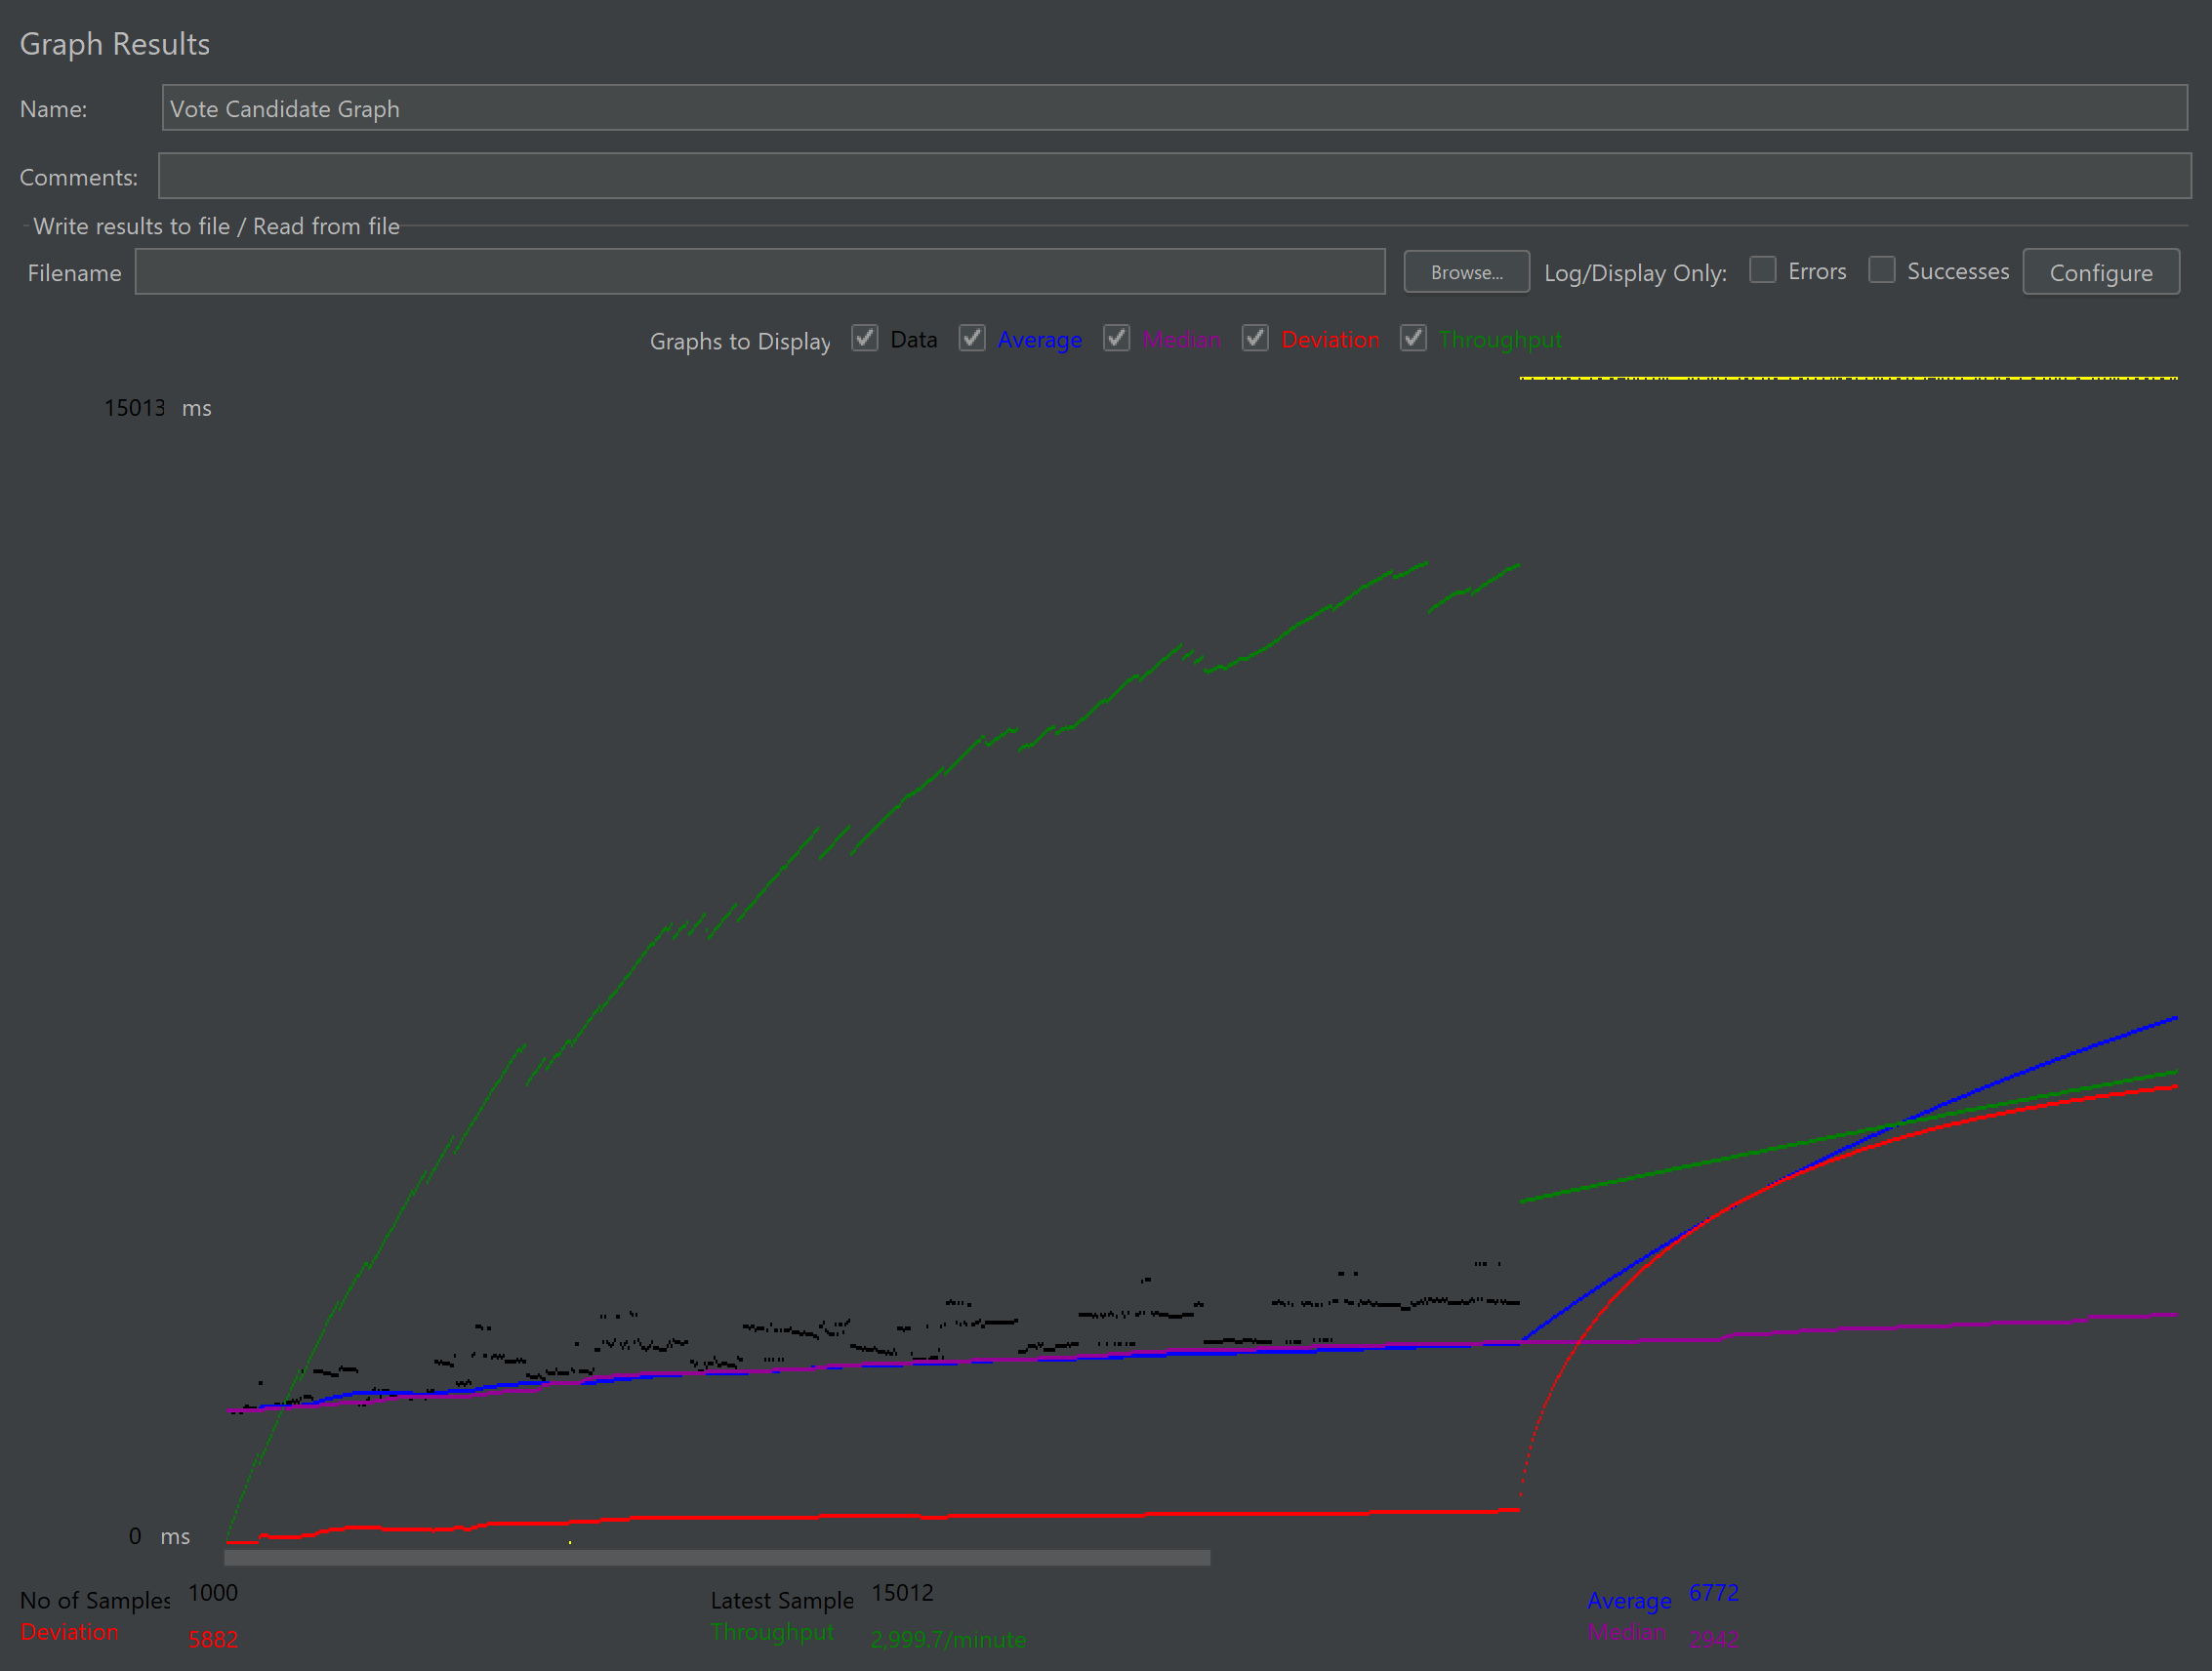

In [6]:
Image(filename='Vote/Vote_1000T.png')

In [7]:
get500b = load_dataset('Get/Get_500T_50c.csv')
getSum500b = load_summary('Get/Get_500T_50c_Summary.csv')

get500_250c = load_dataset('Get/Get_500T_250c.csv')
getSum500_250c = load_summary('Get/Get_500T_250c_Summary.csv')

In [8]:
get1000b = load_dataset('Get/Get_1000T_50c.csv')
getSum1000b = load_summary('Get/Get_1000T_50c_Summary.csv')

get1000_250c = load_dataset('Get/Get_1000T_250c.csv')
getSum1000_250c = load_summary('Get/Get_1000T_250c_Summary.csv')

### JMeter Graph Showing getCandidates API Results: 1000 Threads 50 Candidates per pull

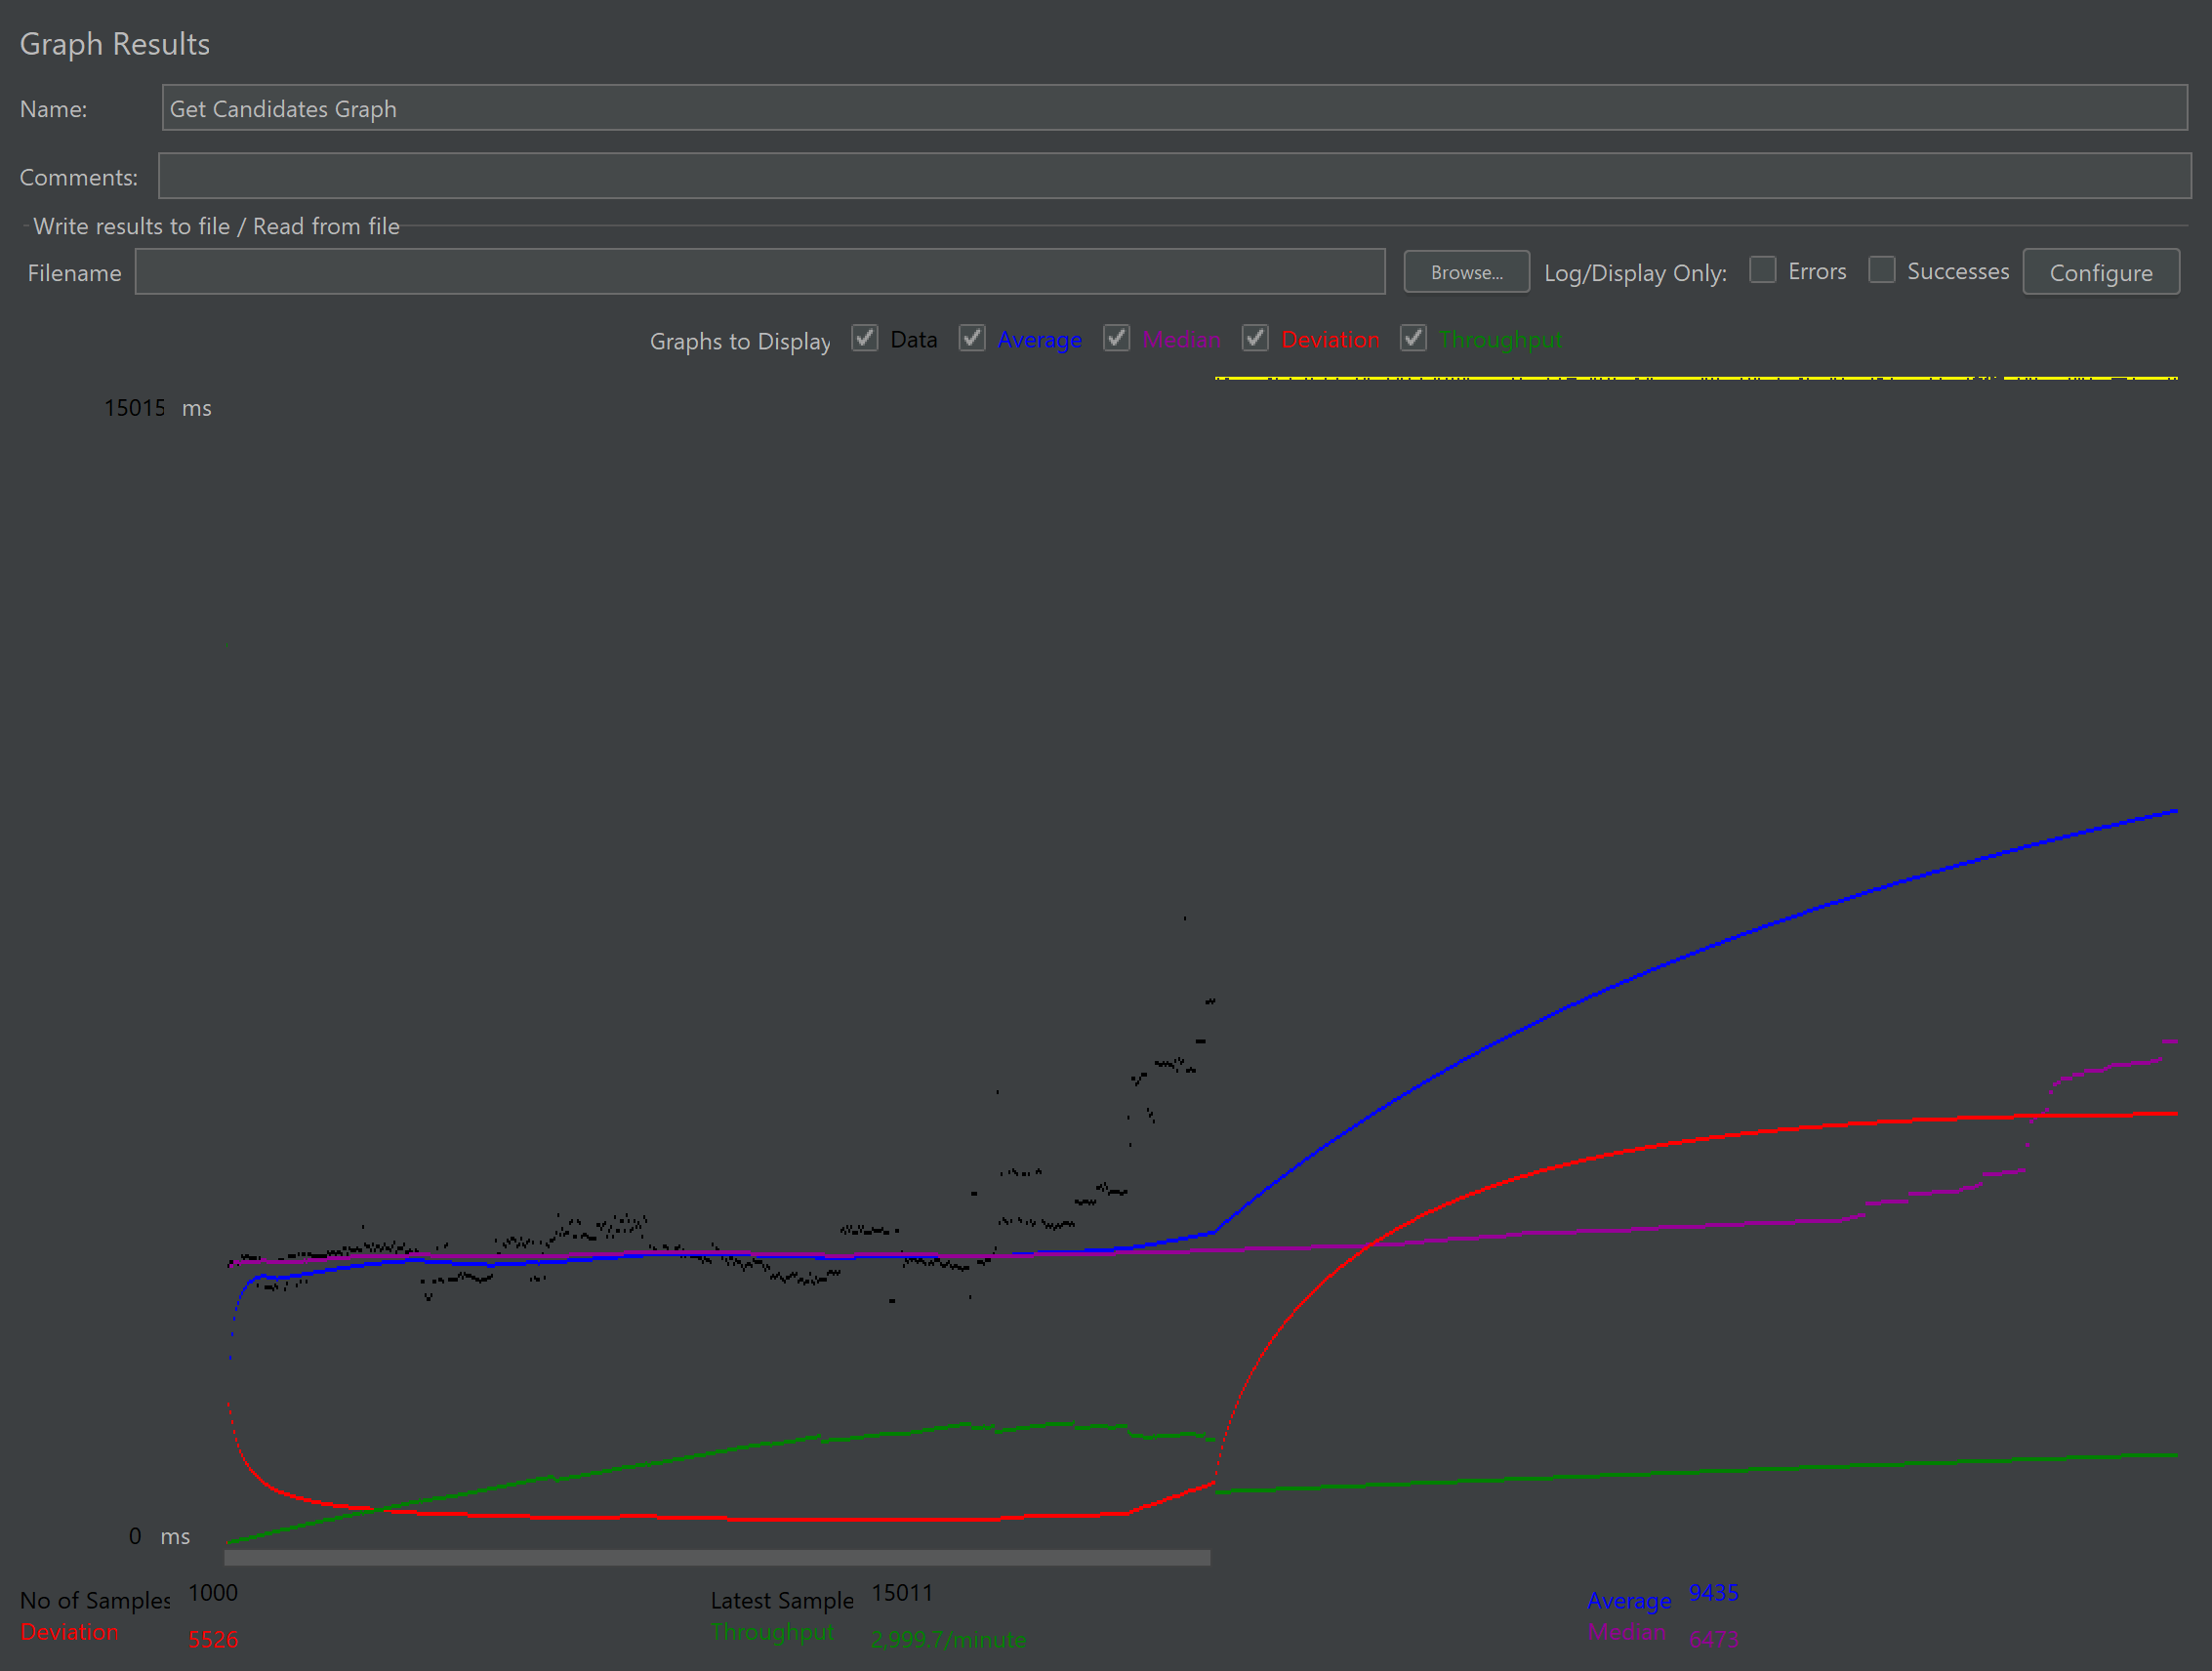

In [9]:
Image(filename='Get/Get_1000T_50c.png')

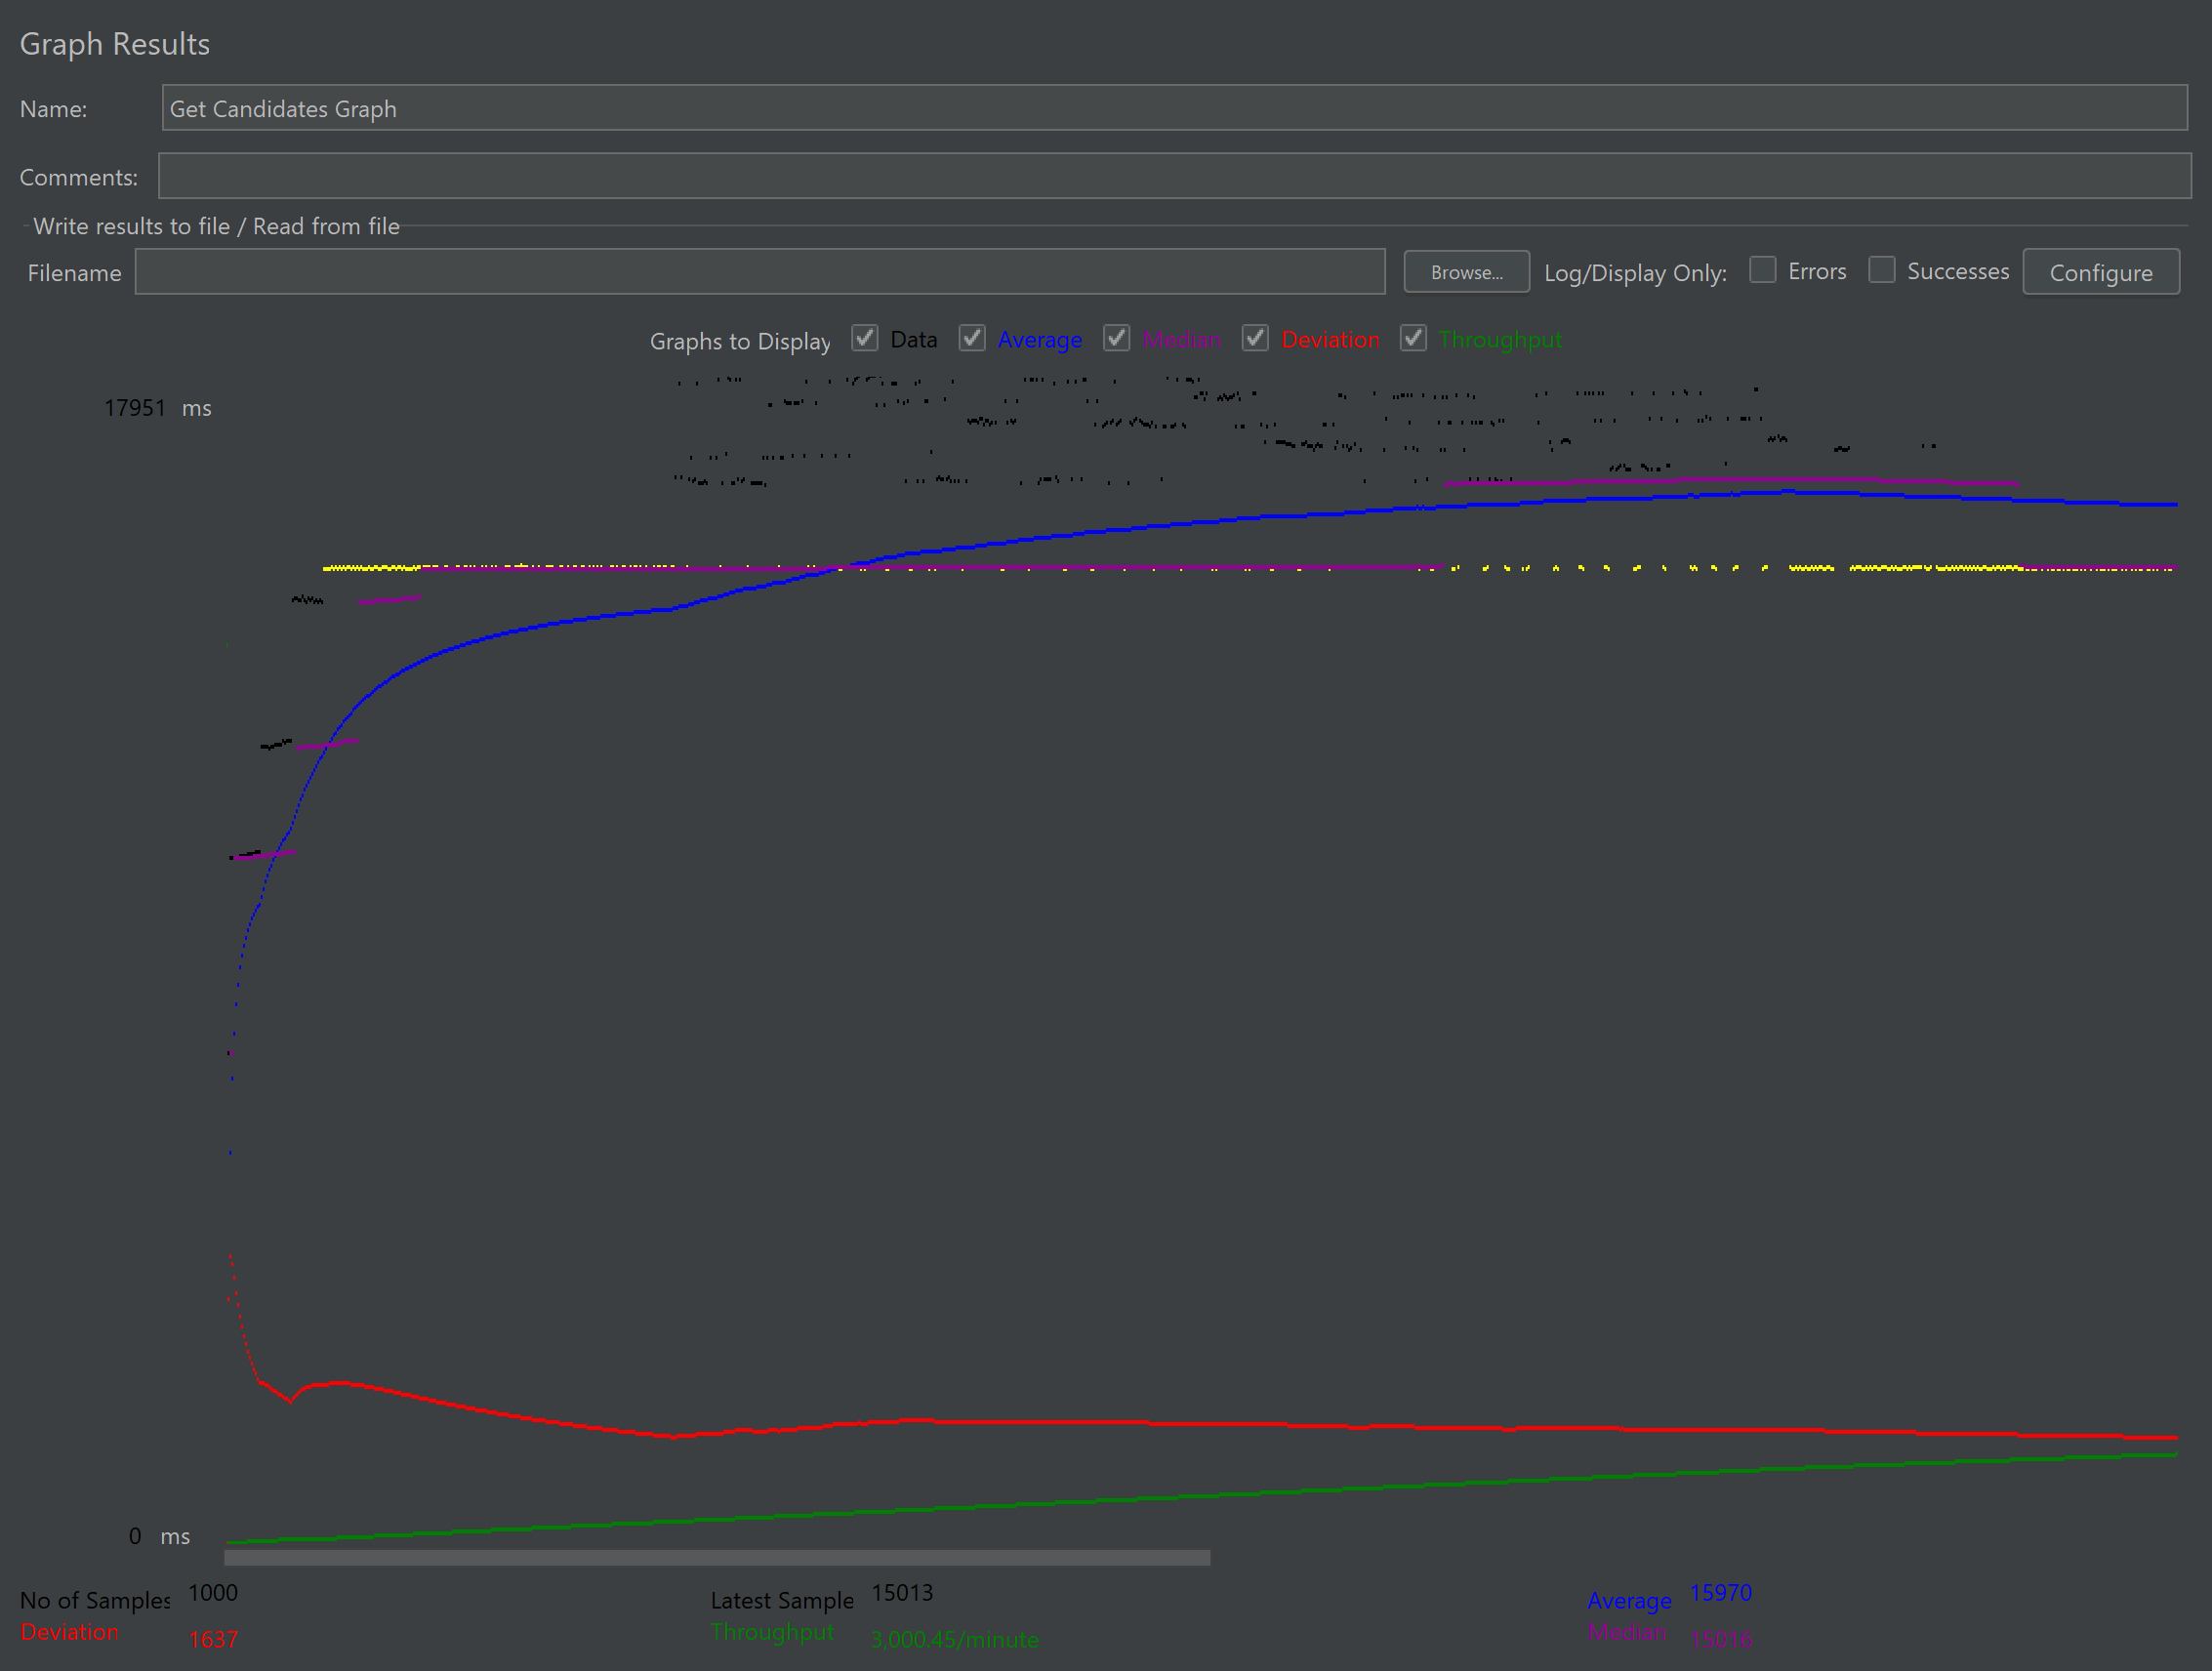

In [10]:
Image(filename='Get/Get_1000T_250c.png')

### JMeter Graph Showing getCandidates API Results: 1000 Threads 250 Candidates per pull

In [11]:
# get1000b

In [12]:
# get1000_250c

In [13]:
# add1000

### Elapsed Time per Transcation across 500 and 1000 Threads

In this section we plot the elapsed time of the add, vote, and get transactions across 500 and 1000 threads respectively. We can see that in the 500 thread plot, there is not a dramatic increase in elapsed time because the backend server does not hang. When we look at the 1000 thread plot we can see a near vertical line in the elapsed time, showing the number of threads that cause a hang in the backend server. 

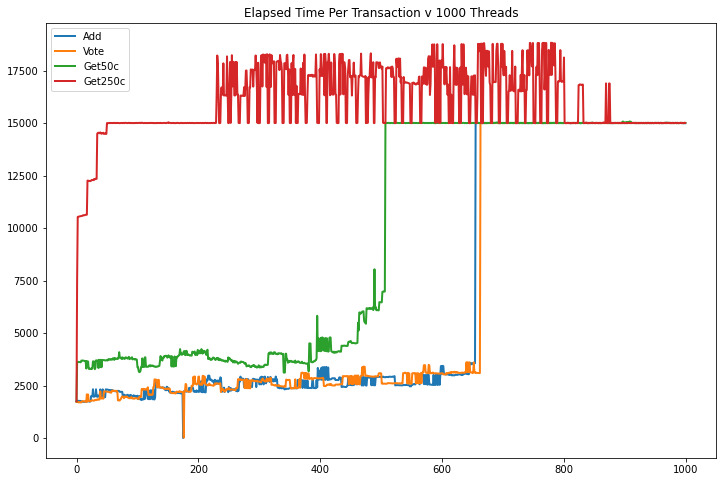

In [14]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ax.plot(range(0,1000), add1000.elapsed, linewidth=2.0, label="Add")
ax.plot(range(0,1000), vote1000.elapsed, linewidth=2.0, label="Vote")
ax.plot(range(0,1000), get1000b.elapsed, linewidth=2.0, label="Get50c")
ax.plot(range(0,1000), get1000_250c.elapsed, linewidth=2.0, label="Get250c")
ax.title.set_text('Elapsed Time Per Transaction v 1000 Threads')
ax.legend(loc="upper left")

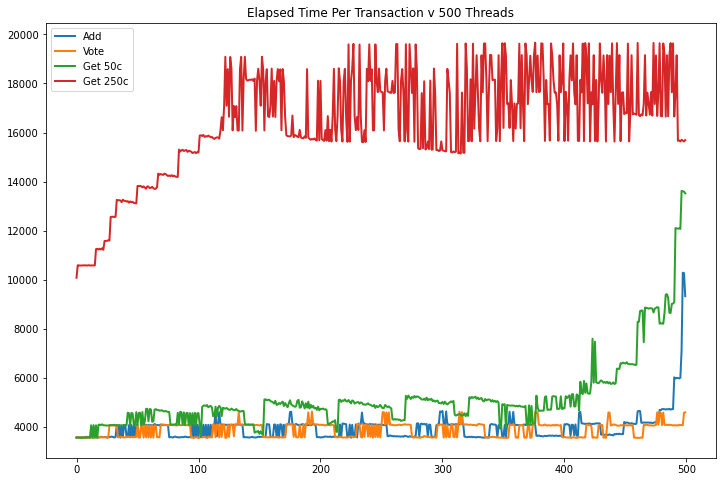

In [15]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ax.plot(range(0,500), add500.elapsed, linewidth=2.0, label="Add")
ax.plot(range(0,500), vote500.elapsed, linewidth=2.0, label="Vote")
ax.plot(range(0,500), get500b.elapsed, linewidth=2.0, label="Get 50c")
ax.plot(range(0,500), get500_250c.elapsed, linewidth=2.0, label="Get 250c")
ax.title.set_text('Elapsed Time Per Transaction v 500 Threads')
ax.legend(loc="upper left")

### Throughput Per Minute over 1000 Threads
In the following section we calculate the average throughput per minute of each transaction across each the add, vote, and get function. We test the getfunction while retrieving 50 candidates as opposed to 250 candidates. Throughput is calculated as (number of requests)/(total elapsed time). Similar to the plot of elapsed time for 1000 threads we can see a dip in throughput for the add, vote, and get 50 candidates functions when the backend hangs. In comparison we do not see a throughput dip for retrieval of 250 candidates, since the throughput was much slower in growth.  

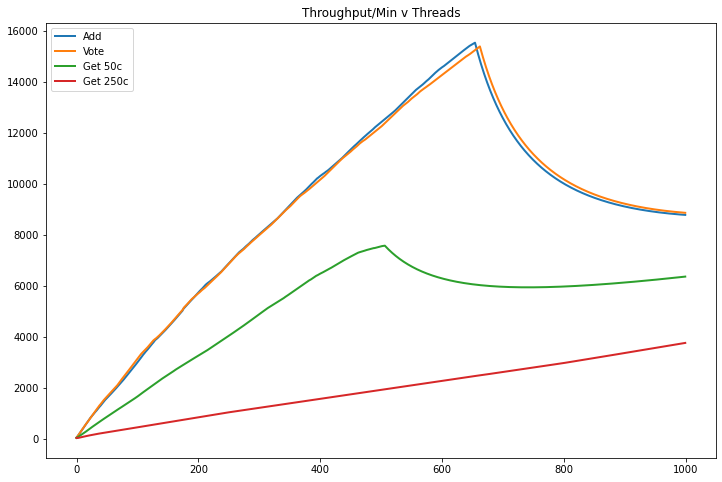

In [16]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ax.plot(range(0,1000), add1000.throughput, linewidth=2.0, label="Add")
ax.plot(range(0,1000), vote1000.throughput, linewidth=2.0, label="Vote")
ax.plot(range(0,1000), get1000b.throughput, linewidth=2.0, label="Get 50c")
ax.plot(range(0,1000), get1000_250c.throughput, linewidth=2.0, label="Get 250c")
ax.title.set_text('Throughput/Min v Threads')
ax.legend(loc="upper left")

In [17]:
addSum1000

,Label,# Samples,Average,Min,Max,Std. Dev.,Error %,Throughput,Received KB/sec,Sent KB/sec,Avg. Bytes
0,HTTP Request,1000,6835,3,15028,5941.17,34.600%,49.77601,49.33,7.34,1014.9
1,TOTAL,1000,6835,3,15028,5941.17,34.600%,49.77601,49.33,7.34,1014.9


In [18]:
voteSum1000

,Label,# Samples,Average,Min,Max,Std. Dev.,Error %,Throughput,Received KB/sec,Sent KB/sec,Avg. Bytes
0,HTTP Request,1000,6772,20,15019,5882.95,33.800%,49.995,48.7,7.27,997.5
1,TOTAL,1000,6772,20,15019,5882.95,33.800%,49.995,48.7,7.27,997.5


In [19]:
getSum1000b

,Label,# Samples,Average,Min,Max,Std. Dev.,Error %,Throughput,Received KB/sec,Sent KB/sec,Avg. Bytes
0,HTTP Request,1000,9737,3,15028,5212.69,49.500%,49.9975,100.95,5.2,2067.6
1,TOTAL,1000,9737,3,15028,5212.69,49.500%,49.9975,100.95,5.2,2067.6


In [20]:
getSum1000_250c

,Label,# Samples,Average,Min,Max,Std. Dev.,Error %,Throughput,Received KB/sec,Sent KB/sec,Avg. Bytes
0,HTTP Request,1000,15970,2,18835,1637.37,49.100%,50.0075,248.77,5.24,5094.1
1,TOTAL,1000,15970,2,18835,1637.37,49.100%,50.0075,248.77,5.24,5094.1


### Throughput per Second
In the following segement we plot throughput per second of each function in both the 500 thread and 1000 thread groups respectively. In this we actually see that when testing on our local machine that there is an upper limit of approximately 50 throughput per second. This also tells us that on the 500 thread group the upper limit on the throughput is actually bottlenecked by the number of threads being called instead of any problems related to function or server. 

<AxesSubplot:title={'center':'Throughput/Sec Across Thread Groups'}, xlabel='Threads'>

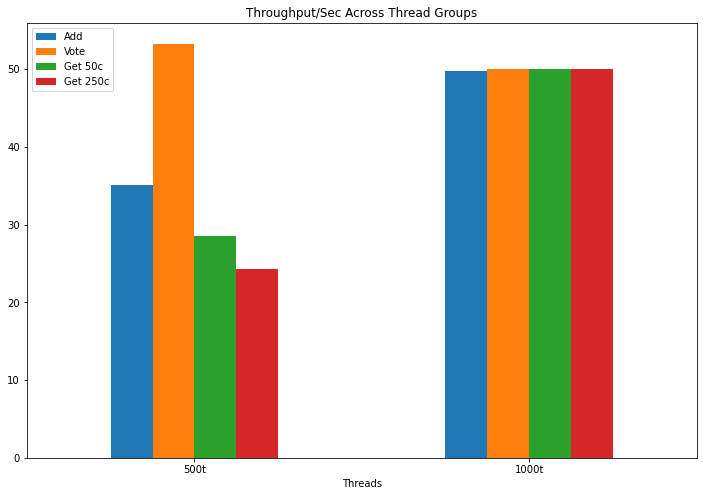

In [21]:
r1 = ['500t', addSum500.Throughput[1], voteSum500.Throughput[1], getSum500b.Throughput[1], getSum500_250c.Throughput[1]]
r2 = ['1000t', addSum1000.Throughput[1], voteSum1000.Throughput[1], getSum1000b.Throughput[1], getSum1000_250c.Throughput[1]]

df = pd.DataFrame([r1, r2], columns=['Threads', 'Add', 'Vote', 'Get 50c', 'Get 250c'])

df.plot(x='Threads',
        kind='bar',
        stacked=False,
        title='Throughput/Sec Across Thread Groups',
        figsize=(12, 8),
        rot=0)


### Throughput vs Bytes
When comparing the results of the functions for 500 threads to 1000 threads, we can see that the number of bytes play a less significant role on throughput per second when there is a hang in the backend server. When the server is running optimally we can see that the increase in number of bytes can lead to lower throughput, however, when factoring in a server hang the number of bytes do not have a significant affect on overall throughput. This is also indicated by the plots in throughput per second where we see that the limiting factor on throughput is actually the number of threads being called. 

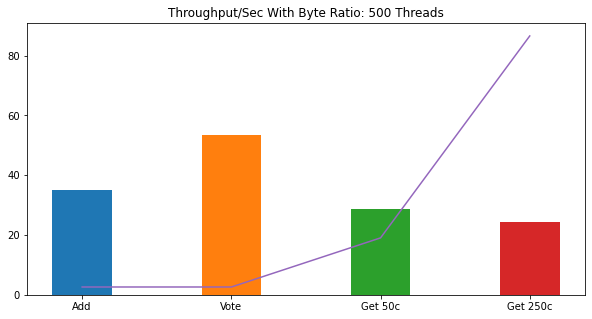

In [22]:
Bytes = [addSum500['Avg. Bytes'][1], voteSum500['Avg. Bytes'][1], getSum500b['Avg. Bytes'][1], getSum500_250c['Avg. Bytes'][1]]
Throughput = [addSum500.Throughput[1], voteSum500.Throughput[1], getSum500b.Throughput[1], getSum500_250c.Throughput[1]]
labels = ['Add', 'Vote', 'Get 50c', 'Get 250c']
colors= ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
ScaledBytes=[x/100 for x in Bytes]
fig = plt.figure(figsize = (10, 5))
plt.bar(labels, Throughput, width=0.4, color = colors)
plt.plot(labels, ScaledBytes, color = 'tab:purple')
plt.title("Throughput/Sec With Byte Ratio: 500 Threads")
plt.show()

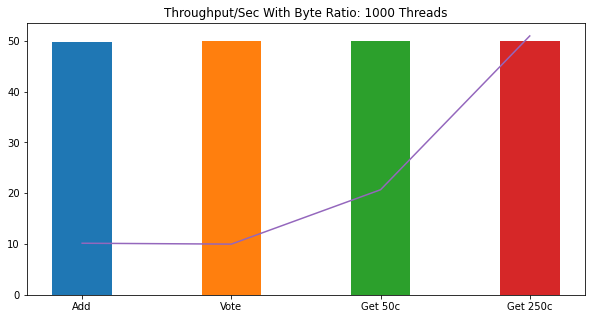

In [23]:
Bytes = [addSum1000['Avg. Bytes'][1], voteSum1000['Avg. Bytes'][1], getSum1000b['Avg. Bytes'][1], getSum1000_250c['Avg. Bytes'][1]]
Throughput = [addSum1000.Throughput[1], voteSum1000.Throughput[1], getSum1000b.Throughput[1], getSum1000_250c.Throughput[1]]
labels = ['Add', 'Vote', 'Get 50c', 'Get 250c']
colors= ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
ScaledBytes=[x/100 for x in Bytes]
fig = plt.figure(figsize = (10, 5))
plt.bar(labels, Throughput, width=0.4, color = colors)
plt.plot(labels, ScaledBytes, color = 'tab:purple')
plt.title("Throughput/Sec With Byte Ratio: 1000 Threads")
plt.show()

### Comparison of Failed Transactions Per Function with Byte Ratio
After seeing that the average throughput for each of the functions is about the same when running the 1000 thread group we need to consider the number of transactions that failed. In this case we can see that the increase in bytes may lead to earlier cases where we cannot connect to the server. For this segment we can also refer to the previous graph of elapsed time per transaction, increasing the number of return bytes per transaction increases the elapsed time per transaction, which eventually leads to a bottleneck in network transaction time. 

In [24]:
def calcFailed(df, summary):
    failed = df.success.value_counts()[0]
    summary['Failed'] = failed
    return summary

In [25]:
addSum1000 = calcFailed(add1000, addSum1000)
voteSum1000 = calcFailed(vote1000, voteSum1000)
getSum1000b = calcFailed(get1000b, getSum1000b)
getSum1000_250c = calcFailed(get1000_250c, getSum1000_250c)

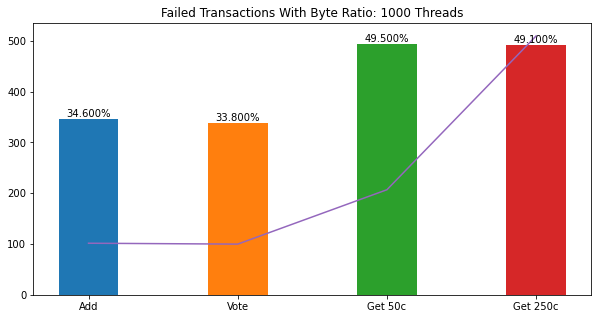

In [26]:
FailedTrans = [addSum1000['Failed'][1], 
               voteSum1000['Failed'][1], 
               getSum1000b['Failed'][1], 
               getSum1000_250c['Failed'][1]]

PercentLabels = [addSum1000['Error %'][1], 
               voteSum1000['Error %'][1], 
               getSum1000b['Error %'][1], 
               getSum1000_250c['Error %'][1]]

Bytes = [addSum1000['Avg. Bytes'][1], voteSum1000['Avg. Bytes'][1], getSum1000b['Avg. Bytes'][1], getSum1000_250c['Avg. Bytes'][1]]
ScaledBytes=[x/10 for x in Bytes]

labels = ['Add', 'Vote', 'Get 50c', 'Get 250c']
colors= ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

fig = plt.figure(figsize = (10, 5))
bars = plt.bar(labels, FailedTrans, width=0.4, color = colors)
plt.bar_label(bars, PercentLabels)
plt.plot(labels, ScaledBytes, color = 'tab:purple')

plt.title("Failed Transactions With Byte Ratio: 1000 Threads")
plt.show()